<a href="https://colab.research.google.com/github/ramoneas/FCC-ML-Challenge/blob/main/fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

In [136]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [147]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2025-05-16 07:51:05--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.3’

insurance.csv.3     100%[===================>]  49.09K  --.-KB/s    in 0.01s   

2025-05-16 07:51:05 (4.43 MB/s) - ‘insurance.csv.3’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [148]:
def apply_categorical_encoder(feature):
  #Change to embedding layer only when the feature have 100+ categories inside",
  dataset_tensor = tf.constant(feature.values)
  lookup_layer = tf.keras.layers.StringLookup(output_mode="one_hot")
  lookup_layer.adapt(dataset_tensor)

  return tf.cast(lookup_layer(dataset_tensor), tf.float32)

Make sure to convert categorical data to numbers.

In [138]:
sex_encoded = apply_categorical_encoder(dataset.sex)
smoker_encoded = apply_categorical_encoder(dataset.smoker)
region_encoded = apply_categorical_encoder(dataset.region)

In [139]:
age = tf.constant(dataset.age.values, dtype=tf.float32)
bmi = tf.constant(dataset.bmi.values, dtype=tf.float32)
children = tf.constant(dataset.children.values, dtype=tf.float32)
expenses = tf.constant(dataset.expenses.values)
expenses = tf.cast(expenses, tf.float32) #Need it cause expenses is originally float64\n,

# Stack numéricas en una sola matriz\n,
numerical_data = tf.stack([age, bmi, children], axis=1)

Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

In [140]:
# Concatenamos todo\n,
features = tf.concat([numerical_data, sex_encoded, smoker_encoded, region_encoded], axis=1)
encoded_dataset = tf.concat([features, tf.expand_dims(expenses, axis=1)], axis=1)

In [141]:
df = tf.random.shuffle(encoded_dataset, seed=42) #Shuffle to reorder the data.

# División 80/20\n,
train_size = int(0.8 * len(df))
train_dataset = df[:train_size]
test_dataset = df[train_size:]

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

In [142]:
train_labels = train_dataset[:, -1]
test_labels = test_dataset[:, -1]

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

In [144]:
input_shape = train_dataset[0].shape[0] #Numero de columnas.

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_shape,)),
    tf.keras.layers.Dense(1)
])

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mse',
    metrics=['mae', 'mse']
)

In [145]:
model.fit(train_dataset, train_labels, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 81455944.0000 - mae: 5462.0132 - mse: 81455944.0000
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1198790.6250 - mae: 693.4860 - mse: 1198790.6250
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 36833.9492 - mae: 118.6864 - mse: 36833.9492
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3099.4058 - mae: 46.5362 - mse: 3099.4058
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1670.7938 - mae: 37.9461 - mse: 1670.7938
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1454.1199 - mae: 35.1776 - mse: 1454.1199
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1308.7870 - mae: 33.1624 - mse: 1308.7870
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1163.0367 - mae: 31.8637 - mse: 1163.0367
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 963.0959 - mae: 28.6866 - mse: 963.0959
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 834.8481 - m

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

9/9 - 0s - 29ms/step - loss: 0.6019 - mae: 0.5733 - mse: 0.6019
Testing set Mean Abs Error:  0.57 expenses
You passed the challenge. Great job!
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


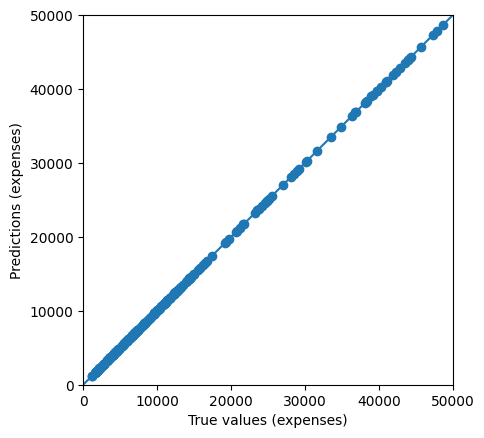

In [146]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
